In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#to load csv file
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.shape

(200, 6)

In [4]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


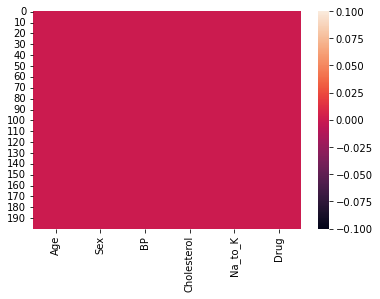

In [5]:
#check null values
f=df.isnull().sum()
print(f)
sb.heatmap(df.isnull())
plt.show()

In [6]:
#check datatypes
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
#check duplicates values
df.duplicated().sum()
#here is no duplicate value

0

In [8]:
#first convert object type data to int type use label encoder
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['BP']=le.fit_transform(df['BP'])
df['Cholesterol']=le.fit_transform(df['Cholesterol'])
df['Drug']=le.fit_transform(df['Drug'])

In [9]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64


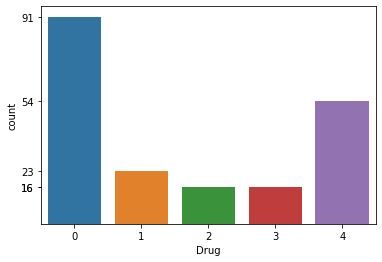

In [10]:
#check data is bal or not
f=df['Drug'].value_counts()
sb.countplot(data=df,x='Drug')
print(f)
plt.yticks(f)
plt.show()

In [11]:
#check datatypes
df.dtypes

Age              int64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [12]:
#selct input and output
X=df.drop("Drug",axis=1) #select input
Y=df['Drug'] #select output

In [13]:
X.shape

(200, 5)

In [14]:
#if we have more than two class use SMOTE inbuild class
from imblearn.over_sampling import SMOTE
X1,Y1=SMOTE().fit_resample(X,Y)

In [15]:
Y1.value_counts()

0    91
3    91
4    91
1    91
2    91
Name: Drug, dtype: int64

In [16]:
#train test
#apply train test split on train data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.3,
                                              random_state=1,stratify=Y1)

In [17]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #convert into numpy array
X_test=ss.transform(X_test)#convert into numpy array

In [19]:
Y_train.value_counts()

4    64
2    64
1    64
3    63
0    63
Name: Drug, dtype: int64

In [20]:
Y_test.value_counts()

0    28
3    28
2    27
1    27
4    27
Name: Drug, dtype: int64

In [21]:
#create fn
def create_model(model):
    
    #train data with 70%
    model.fit(X_train,Y_train)
    #test datawith 30%
    Y_pred=model.predict(X_test)
    #generate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    
    return model

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
#give dataset to logistregression
from sklearn.linear_model import LogisticRegression
#create object of class
lr=LogisticRegression()

In [24]:
#call fn
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       1.00      1.00      1.00        27
           2       0.93      1.00      0.96        27
           3       0.97      1.00      0.98        28
           4       0.96      0.93      0.94        27

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137

[[25  0  2  0  1]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 1  0  0  1 25]]


In [25]:
#give dataset to decision tree classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1) #by default gini

In [28]:
#call fn
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.96      0.93      0.95        28
           4       0.93      0.96      0.95        27

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 26  2]
 [ 0  0  0  1 26]]


In [29]:
#check information gain :
dict={"input":X.columns,"IG":dt.feature_importances_}
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,BP,0.351605
1,Na_to_K,0.261531
2,Age,0.260509
3,Cholesterol,0.119018
4,Sex,0.007338


In [30]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=4)
#call fn
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.93      1.00      0.97        28
           4       1.00      0.93      0.96        27

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  2 25]]


In [31]:
#check information gain
dict={"Input":X.columns,"IG":dt1.feature_importances_}
#convert to dataframe
df2=pd.DataFrame(dict)
#sorting
df2.sort_values("IG",ascending=False,ignore_index=True)

,Input,IG
0,BP,0.362319
1,Age,0.259242
2,Na_to_K,0.255795
3,Cholesterol,0.122644
4,Sex,0.000000


In [32]:
#apply second pruning technique min_samples_leaf

In [33]:
#create object of decisiontreeclassifier
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call fn
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.69      0.79      0.73        28
           4       0.74      0.63      0.68        27

    accuracy                           0.88       137
   macro avg       0.89      0.88      0.88       137
weighted avg       0.88      0.88      0.88       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 22  6]
 [ 0  0  0 10 17]]


In [34]:
#check information gain
dict={"input":X.columns,"IG":dt2.feature_importances_}
#convert to dataframe
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)
#here not imp features get o

,input,IG
0,Na_to_K,0.337564
1,Age,0.331863
2,BP,0.330572
3,Sex,0.000000
4,Cholesterol,0.000000


In [35]:
#give dataset to DecisionTreeClassifier Entropy

In [36]:
#create object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [37]:
#call fn
dt_entropy=create_model(dt_entropy)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      1.00      1.00        27
           2       0.96      1.00      0.98        27
           3       0.96      0.93      0.95        28
           4       0.93      0.96      0.95        27

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137

[[27  0  1  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 26  2]
 [ 0  0  0  1 26]]


In [38]:
#check IG
dict={"input":X.columns,"IG":dt_entropy.feature_importances_}
#convert to dataframe
df4=pd.DataFrame(dict)
#sorting
df4.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,BP,0.411512
1,Na_to_K,0.316109
2,Age,0.188516
3,Cholesterol,0.077817
4,Sex,0.006046


In [39]:
#create object of DecisionTreeClassifier class
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=3,criterion='entropy')
#call fn
dt_entropy1=create_model(dt_entropy1)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       1.00      1.00      1.00        27
           2       0.96      1.00      0.98        27
           3       0.76      1.00      0.86        28
           4       1.00      0.67      0.80        27

    accuracy                           0.93       137
   macro avg       0.94      0.93      0.93       137
weighted avg       0.94      0.93      0.92       137

[[27  0  1  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  9 18]]


In [40]:
#check IG
dict={"input":X.columns,"IG":dt_entropy1.feature_importances_}
#convert to dataframe
df5=pd.DataFrame(dict)
#sorting
df5.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,BP,0.461038
1,Na_to_K,0.341132
2,Age,0.197830
3,Sex,0.000000
4,Cholesterol,0.000000


In [41]:
#create object of DT
dt_entropy2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
#call fn
dt_entropy2=create_model(dt_entropy2)

              precision    recall  f1-score   support

           0       0.89      0.57      0.70        28
           1       0.75      1.00      0.86        27
           2       0.90      1.00      0.95        27
           3       0.53      0.61      0.57        28
           4       0.48      0.37      0.42        27

    accuracy                           0.71       137
   macro avg       0.71      0.71      0.70       137
weighted avg       0.71      0.71      0.70       137

[[16  9  3  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 17 11]
 [ 2  0  0 15 10]]


In [42]:
#check IG
dict={"input":X.columns,"IG":dt_entropy2.feature_importances_}
#convert to dataframe
df6=pd.DataFrame(dict)
#sorting
df6.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,BP,0.525047
1,Age,0.275112
2,Na_to_K,0.199841
3,Sex,0.000000
4,Cholesterol,0.000000


In [43]:
#give dataset to random forest classifer

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=11,random_state=1)
#call fn
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.97      1.00      0.98        28
           4       1.00      0.96      0.98        27

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  1 26]]


In [46]:
#check information gain :
dict={"input":X.columns,"IG":rfc.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,BP,0.354947
1,Na_to_K,0.309800
2,Age,0.230856
3,Cholesterol,0.090143
4,Sex,0.014255


In [47]:
rfc1=RandomForestClassifier(n_estimators=11,random_state=1,max_depth=6) 
#call function 
rfc1=create_model(rfc1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.97      1.00      0.98        28
           4       1.00      0.96      0.98        27

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  1 26]]


In [48]:
rfc2=RandomForestClassifier(n_estimators=11,random_state=1,min_samples_leaf=46) 
#by default gini index
#call fn
rfc2=create_model(rfc2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.57      0.86      0.69        28
           4       0.67      0.30      0.41        27

    accuracy                           0.83       137
   macro avg       0.84      0.83      0.82       137
weighted avg       0.84      0.83      0.82       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 24  4]
 [ 1  0  0 18  8]]


In [49]:
#check information gain :
dict={"input":X.columns,"IG":rfc2.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,BP,0.412518
1,Na_to_K,0.359063
2,Age,0.222634
3,Sex,0.005784
4,Cholesterol,0.000000


In [50]:
#apply boosting technique
#first apply ADA boost
from sklearn.ensemble import AdaBoostClassifier

In [51]:
X.shape

(200, 5)

In [52]:
#create object of AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1,n_estimators=2)
#call fn
ada=create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.50      1.00      0.67        27
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00        28
           4       0.49      1.00      0.66        27

    accuracy                           0.60       137
   macro avg       0.40      0.60      0.47       137
weighted avg       0.40      0.60      0.47       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0  0  0 28]
 [ 0  0  0  0 27]]


In [53]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":ada.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,BP,0.5
1,Na_to_K,0.5
2,Age,0.0
3,Sex,0.0
4,Cholesterol,0.0


In [54]:
#apply second boosting tech gradient boost
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=74)
#call fn
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.93      1.00      0.97        28
           4       1.00      0.93      0.96        27

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  2 25]]


In [56]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":gbc.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,Na_to_K,0.379371
1,BP,0.338500
2,Age,0.183026
3,Cholesterol,0.098650
4,Sex,0.000453


In [57]:
#apply extreme gradient boost tech
#work on gradient boost
#advanced version of gradient boost
#overfit situation handle
#outliear handle and null value handle
#it is better than gradient boost

In [58]:
#first to install xgboost
#!pip install xgboost

In [59]:
from xgboost import XGBClassifier
#create object of XGBClassifier
#n_estimator >=10 and <=100
#reg_alpha=1 here 1 means doing task to t=remove outlier and overfitting
#reg means regularisation and alpha means Lambda means hyperparameter
#if reg_alpha=1 , 1 means True means automatic handle outlier and overfitting

In [60]:
#create object of GradientBoostingClassifier class
xgc=XGBClassifier(random_state=1,n_estimators=10,reg_alpha=1)
#call fn
xgc=create_model(xgc)

[14:31:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        27
           3       0.93      1.00      0.97        28
           4       1.00      0.93      0.96        27

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137

[[28  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 0  0  0  2 25]]


In [61]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":xgc.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)
#11 iteration ke baad bataya ki konse features imp hai n_estimator=10

,input,IG
0,Na_to_K,0.291022
1,BP,0.290812
2,Cholesterol,0.230512
3,Age,0.184849
4,Sex,0.002805


In [62]:
#give data to support vector machine
#1.Linear kernal function of support vector machine 
#means suppose data are linear separatable with the help of straight line
#call inbuild claass for Linear SVM :linear SVC
#SVC means support vector classifier
#data give to linear

In [63]:
from sklearn.svm import LinearSVC

In [64]:
#create obhect of LinearSVC class
#here no add error
svc=LinearSVC(random_state=1)

In [65]:
#call fn
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       1.00      1.00      1.00        27
           2       0.96      1.00      0.98        27
           3       0.97      1.00      0.98        28
           4       1.00      0.93      0.96        27

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137

[[27  0  1  0  0]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 28  0]
 [ 1  0  0  1 25]]


In [66]:
#add error while runtime
##C means error parameter ,the value of C can be <=1
svc1=LinearSVC(random_state=1,C=0.07)

In [67]:
#call fn
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.87      0.96      0.91        27
           2       0.90      1.00      0.95        27
           3       0.96      0.93      0.95        28
           4       0.96      0.93      0.94        27

    accuracy                           0.93       137
   macro avg       0.93      0.93      0.93       137
weighted avg       0.93      0.93      0.93       137

[[23  2  2  0  1]
 [ 0 26  1  0  0]
 [ 0  0 27  0  0]
 [ 0  2  0 26  0]
 [ 1  0  0  1 25]]


In [68]:
#apply KNN algorithm :inbuild class KneighborsClassifier which define in
from sklearn.neighbors import KNeighborsClassifier

In [69]:
#create object of KNeighborsClassifier class
#standard n_neighbors=5
#p=2 means Euclidean distance method
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [70]:
#call fn
knc=create_model(knc)

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        28
           1       0.93      1.00      0.96        27
           2       0.93      1.00      0.96        27
           3       0.84      0.96      0.90        28
           4       0.89      0.93      0.91        27

    accuracy                           0.91       137
   macro avg       0.92      0.91      0.91       137
weighted avg       0.92      0.91      0.91       137

[[19  2  2  3  2]
 [ 0 27  0  0  0]
 [ 0  0 27  0  0]
 [ 0  0  0 27  1]
 [ 0  0  0  2 25]]
